In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings("ignore")

### Overview of dataset.

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


 - The max revenue generated by advertising on TV is of approx 296.4 $(lac).
 
 - The ovearall average mean sales is 14.022500 unit.
 
 - The max sales is of 27.000000 unit.
 

### Checking for the null values in dataset.

In [5]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

- Here we can observe that the dataset does not contain any Nan value.

In [6]:
#Dropping the unwanted column.

df=df.drop(["Unnamed: 0"],axis=1)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### EDA

In [8]:
from scipy.stats import skew

TV
-0.06932836662244649


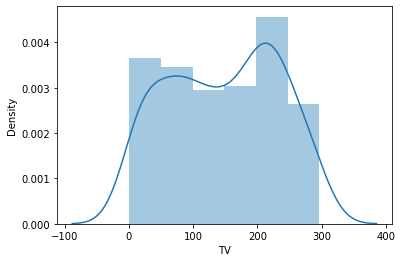

radio
0.0934668451108453


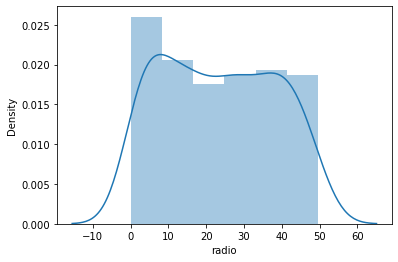

newspaper
0.8879959753085498


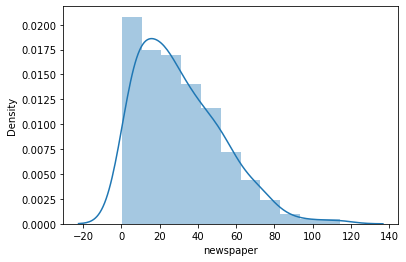

sales
0.4045082487061191


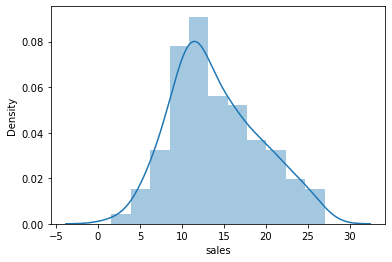

In [9]:
for col in df:
    print(col)
    print(skew( df[col] ))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:>

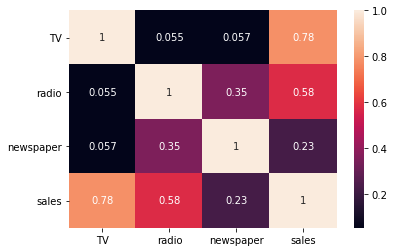

In [10]:
sns.heatmap(df.corr(), annot=True)

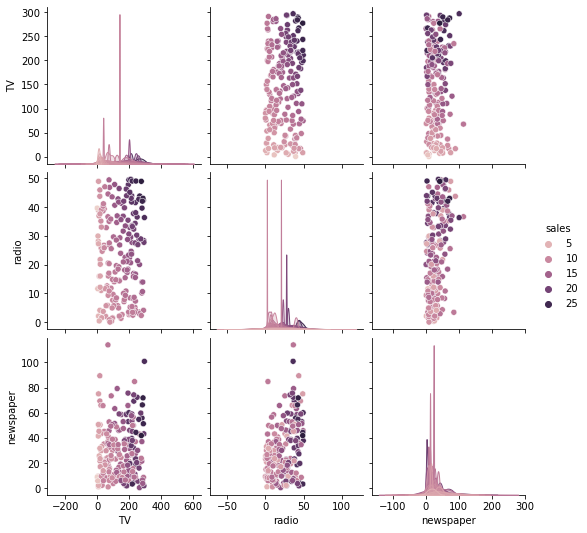

In [11]:
sns.pairplot(df , hue = "sales")

### Splitting the independent and dependent set. 

In [12]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y , test_size = 0.25, random_state = 1)

### Model creation

In [13]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = r2_score(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    print(f"Accuracy -: {ac}\n\nMSE -:\n{mse}\n\nRMSE -:\n{rmse}")

In [20]:
models=[]
models.append(("Linreg     :-", LinearRegression()))
models.append(("Ridge (L2)     :-", Ridge()))
models.append(("Lasso (L1)     :-", Lasso()))
models.append(("KNN     :-", KNeighborsRegressor()))
models.append(("SVM     :-", SVR()))


for name,model in models:
    print(name)
    mymodel(model)
    print("\n\n")

Linreg     :-
Accuracy -: 0.9156213613792231

MSE -:
1.9730456202283404

RMSE -:
1.4046514230328961



Ridge (L2)     :-
Accuracy -: 0.9156174936169327

MSE -:
1.9731360610267688

RMSE -:
1.4046836159885858



Lasso (L1)     :-
Accuracy -: 0.9141407522971794

MSE -:
2.007667051817513

RMSE -:
1.4169216816103538



KNN     :-
Accuracy -: 0.9046722190204983

MSE -:
2.229072

RMSE -:
1.4930077025923207



SVM     :-
Accuracy -: 0.8354357697712419

MSE -:
3.8480442325973847

RMSE -:
1.9616432480441963





### Hyperparameter Tuning.

#### For Ridge Regression.

In [25]:
accuracy=[]
for i in range(1,20):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    ypred = l2.predict(xtest)
    ac= r2_score(ytest,ypred)
    accuracy.append(ac)
    print(f"{i}  :- {ac}")

1  :- 0.9156174936169327
2  :- 0.915613625480324
3  :- 0.9156097569695272
4  :- 0.9156058880846729
5  :- 0.9156020188258911
6  :- 0.9155981491933122
7  :- 0.9155942791870662
8  :- 0.9155904088072833
9  :- 0.9155865380540935
10  :- 0.9155826669276272
11  :- 0.9155787954280142
12  :- 0.9155749235553844
13  :- 0.9155710513098679
14  :- 0.9155671786915948
15  :- 0.9155633057006947
16  :- 0.9155594323372974
17  :- 0.915555558601533
18  :- 0.9155516844935312
19  :- 0.9155478100134217


- Here we can observe that max accuracy is achieved by tuning the alpha value = 1

#### For Lasso Regression.

In [26]:
accuracy=[]
for i in range(1,20):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain, ytrain)
    ypred = l1.predict(xtest)
    ac= r2_score(ytest,ypred)
    accuracy.append(ac)
    print(f"{i}  :- {ac}")

1  :- 0.9141407522971794
2  :- 0.9123334578138773
3  :- 0.9102010769420025
4  :- 0.907242740915405
5  :- 0.903845325302807
6  :- 0.9001268175232843
7  :- 0.896087217576837
8  :- 0.891726525463465
9  :- 0.8870447411831685
10  :- 0.8820418647359471
11  :- 0.8767178961218014
12  :- 0.871072835340731
13  :- 0.8651066823927358
14  :- 0.8588194372778162
15  :- 0.8522110999959718
16  :- 0.8452816705472028
17  :- 0.8380311489315093
18  :- 0.830459535148891
19  :- 0.8225668291993482


 - Here we can observe that max accuracy is achieved by tuning the alpha value = 1

#### For KNN.

In [28]:
accuracy=[]
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    ac= r2_score(ytest,ypred)
    accuracy.append(ac)
    print(f"{i}  :- {ac}")

1  :- 0.9209348098783248
2  :- 0.9322634386446769
3  :- 0.921788222791557
4  :- 0.8940758242357901
5  :- 0.9046722190204983
6  :- 0.8906175062054428
7  :- 0.8918825994025142
8  :- 0.8813113377464095
9  :- 0.8649282411204842
10  :- 0.8451441879130844
11  :- 0.8393407189536333
12  :- 0.8151208151381995
13  :- 0.807388031140756
14  :- 0.8126452119591234
15  :- 0.8132434896711663
16  :- 0.808727420148349
17  :- 0.7994849237513162
18  :- 0.7838163700051536
19  :- 0.7814053919876948


- Here we can observe that max accuracy is achieved by tuning the n_neighbors = 2

#### For SVM.

In [32]:
models=[]

models.append(("SVM-l   :-",SVR(kernel="linear")))
models.append(("SVM-r   :-",SVR(kernel="rbf")))
models.append(("SVM-p   :-",SVR(kernel="poly")))
models.append(("SVM-s   :-",SVR(kernel="sigmoid")))

for name,model in models:
    print(name)
    mymodel(model)
    print("\n\n")

SVM-l   :-
Accuracy -: 0.9178018679654298

MSE -:
1.9220583201235137

RMSE -:
1.3863831794000943



SVM-r   :-
Accuracy -: 0.8354357697712419

MSE -:
3.8480442325973847

RMSE -:
1.9616432480441963



SVM-p   :-
Accuracy -: 0.867965684968917

MSE -:
3.087389548470162

RMSE -:
1.7570969092426751



SVM-s   :-
Accuracy -: -1.7663386148231992

MSE -:
64.68594868632397

RMSE -:
8.042757529997033





- Here we can observe that the max accuracy is achieved by tuning the kernel = linear.

#### From above representation we can conclude that after performing hyperparameter tuning on models max accuracy is achieved by KNN model.

### Re-creating the model.

In [48]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print(f"MSE -: {mean_squared_error(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R-Squared -: {r2_score(ytest, ypred)}")

MSE -: 1.5839000000000005
RMSE -: 1.258530889569263
R-Squared -: 0.9322634386446769


### Cross Validation.

In [50]:
models=[]

models.append(("Linreg      :-", LinearRegression()))
models.append(("Ridge (L2)  :-", Ridge(alpha=1)))
models.append(("Lasso (L1)  :-", Lasso(alpha=1)))
models.append(("KNN         :-", KNeighborsRegressor(n_neighbors=2)))
models.append(("SVM-l       :-",SVR(kernel="linear")))
models.append(("SVM-r       :-",SVR(kernel="rbf")))
models.append(("SVM-p       :-",SVR(kernel="poly")))
models.append(("SVM-s       :-",SVR(kernel="sigmoid")))

print("Name              Accuracy                  STD")
for name, model in models:
    cvs = cross_val_score(model, x, y, cv=10)
    print(f"{name} {cvs.mean()} {cvs.std()}")

Name              Accuracy                  STD
Linreg      :- 0.8853562237979616 0.05258927079041056
Ridge (L2)  :- 0.8853561699903236 0.05258828980043542
Lasso (L1)  :- 0.8861588573668113 0.051486437346237805
KNN         :- 0.9218484358006359 0.037591547581682004
SVM-l       :- 0.8782093747058843 0.07324853659601104
SVM-r       :- 0.8562745894082171 0.05567250511992786
SVM-p       :- 0.8419163834650677 0.04552308848017502
SVM-s       :- -2.3744350512377514 0.7223119985913131


### Conclusion - 

- The max revenue generated by advertising on TV is of approx 296.4 $(lac).
 
- The ovearall average mean sales is 14.022500 unit.
 
- The max sale is of 27.000000 unit.

- As the correlation ranges from -1 to +1 and data have values between this range it can be said that there is a correlation.
 - There is a +ve correlation between "sales" and "TV" , hence it can be said that they are proportional to each other.
 - There is a +ve correlation between "sales" and "newspaper" , hence it  can be said that they are proportional to each other.
 - There is a +ve correlation between "sales" and "radio" , hence it can be said that they are proportional to each other.

- Accuracy of all the models increased after tuning the hyperparameter.

- Max accuracy was achieved by tuning the KNN model.

- The mean accuracy of model was 0.9218484358006359.